## Bolus Glucose Control in Type 1 Diabetes Using Deep Reinforcement Learning
Raphael Joost, 18-???-??? & Yanis Schärer, 18-114-058

In [16]:
from Agent import DDPGAgent
from utils import make_env
import json
import os
import matplotlib.pyplot as plt

#### Create environment

In [2]:
average_patient = make_env('simglucose_average', 'average_adolescent')

State space:
 Dict('CGM': Box(0.0, 10000.0, (6,), float32), 'CHO': Box(0.0, 10000.0, (6,), float32), 'insulin': Box(0.0, 10000.0, (6,), float32))
Action space:
 Box(0.2, 2.0, (3,), float32)


Explore environment

In [7]:
sample_observation, sample_info = average_patient.reset() # Reset environment and get initial observation
sample_action = average_patient.action_space.sample() # Sample a random action

print('Environment info:\n', sample_info, '\n')
print('Observation (flattened):\n', sample_observation, '\n')
print('Action:\n', sample_action, '\n')

Environment info:
 {'time': datetime.datetime(2018, 1, 1, 19, 41), 'meal': 0, 'patient_name': 'average_adolescent', 'sample_time': 3.0} 

Observation (flattened):
 [141.75002 141.75002 141.75002 141.75002 141.75002 141.75002   0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.     ] 

Action:
 [0.59199184 1.9208988  0.5604465 ] 



#### Initialize DDPG agent

In [8]:
agent = DDPGAgent(average_patient)

#### Train agent
Train agent on average patient (This is done on UBELIX). The state of the actor and critic networks are saved in the folder 'agent_state'.
```python
general_critic_loss = agent.general_training()
````

Load trained agent

In [19]:
agent.load_agent('agent_state_yanis')

Agent loaded from folder agent_state_yanis


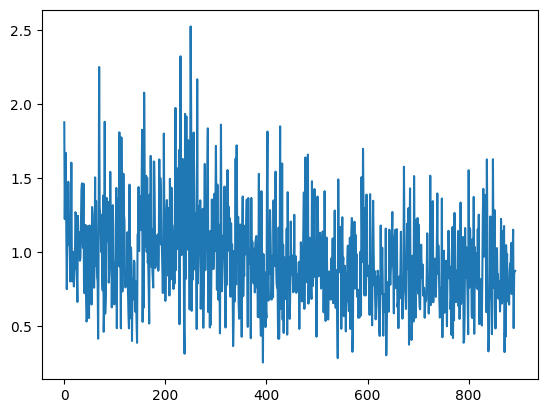

In [20]:
with open(os.path.join('agent_state_yanis','general_training_loss.json')) as f:
    critic_loss = json.load(f)

plt.plot([x[0] for x in critic_loss])

#### Evaluate agent
Evaluate policy on average patient

 10%|▉         | 96/1000 [00:36<05:44,  2.62it/s]

[ 2.91035519  0.11650855 -0.        ]


 11%|█         | 108/1000 [00:40<05:36,  2.65it/s]

Episode finished after 109 timesteps (patient died).
Episode finished.


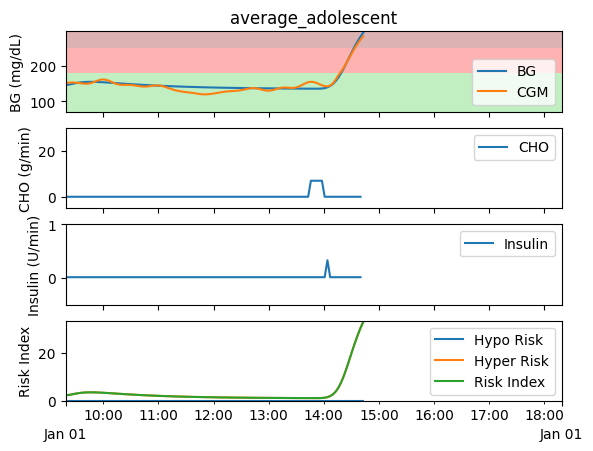

In [21]:
# Load and plot the critic loss
metrics = agent.evaluate_policy(render=True)
# Do something with metrics

In [22]:
print(metrics['actor_output'])

[(datetime.datetime(2018, 1, 1, 14, 4), array([0.26281258, 1.5837139 , 0.9329877 ], dtype=float32))]


#### Fine-tune agent
Fine-tune on a specific patient (e.g. 'adolescent#001')

In [7]:
individual_patient = make_env('simglucose_adolescent001', 'adolescent#001')

State space:
 Dict('CGM': Box(0.0, 10000.0, (6,), float32), 'CHO': Box(0.0, 10000.0, (6,), float32), 'insulin': Box(0.0, 10000.0, (6,), float32))
Action space:
 Box(0.2, 2.0, (3,), float32)


Personalized training is done on UBELIX, the state of the actor and critic networks are loaded below.
```python
personalized_critic_loss = agent.personalized_training(individual_patient)
```
#### Evaluate agent

c:\Users\yanis\anaconda3\envs\simgl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[2.4570494  1.63401099 0.        ]
[ 1.75675949 -0.93145616 -0.        ]
[ 2.91523645 -2.35892276 -0.        ]
[ 2.50347373  1.34245328 -0.        ]
[ 1.89559258 -1.66805627 -0.        ]
[ 2.50356995  0.41158279 -0.        ]
Episode finished.


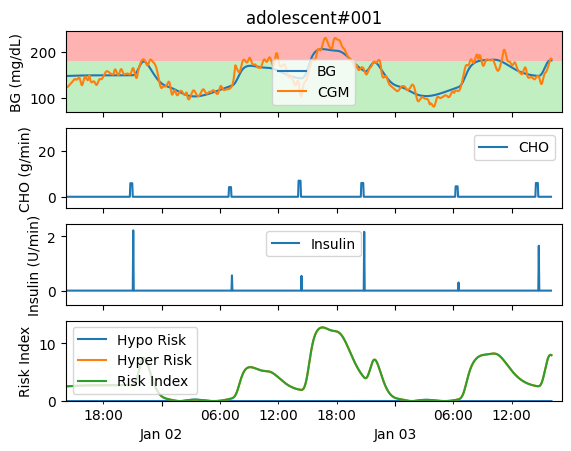

In [9]:
# agent.load_agent('agent_state_finetuned')
# Load and plot the critic loss
metrics = agent.evaluate_policy(individual_patient, render=True)
# Do something with the metrics

Compare before and after fine-tuning